In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

%matplotlib inline
# https://towardsdatascience.com/logistic-regression-a-simplified-approach-using-python-c4bc81a87c31

In [19]:
titanic_csv = '../DATA/titanic_train.csv'
titanic = pd.read_csv('C:/Users/Perrine Mignot/Downloads/titanic.csv')

Exploring data

In [20]:
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [21]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

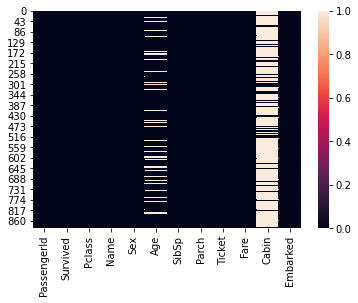

In [22]:
sns.heatmap(titanic.isnull())

AttributeError: module 'seaborn' has no attribute 'xlabel'

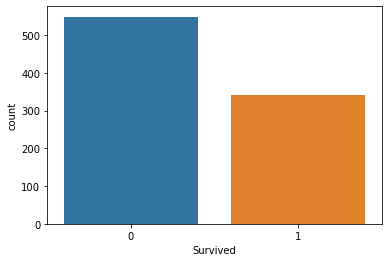

In [23]:
sns.countplot(x='Survived',data=titanic)
sns.xlabel('survived','died')

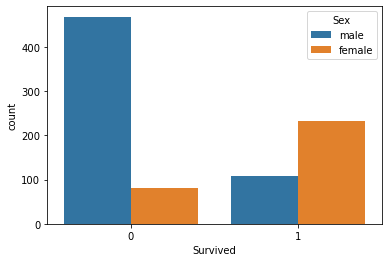

In [24]:
sns.countplot(x='Survived',hue='Sex',data=titanic)

In [25]:
# more females survived than males.

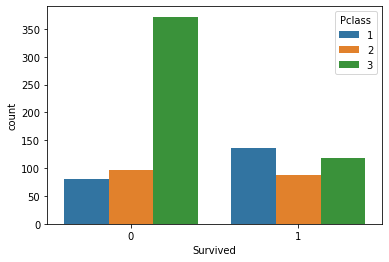

In [26]:
sns.countplot(x='Survived',hue='Pclass',data=titanic)

In [27]:
# passengers belonging to class 3 died the most.

Data Cleaning

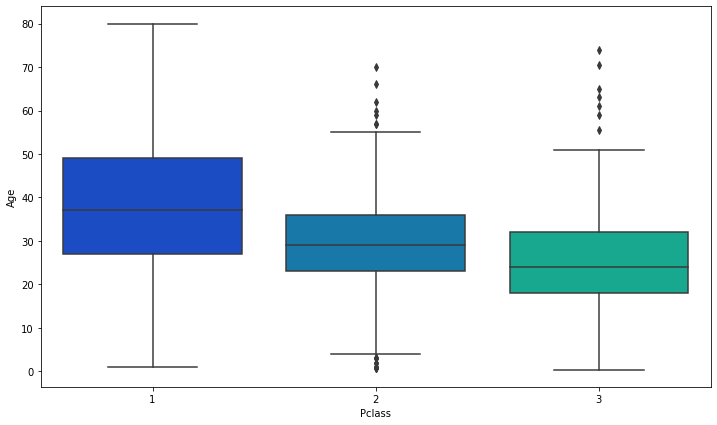

In [28]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=titanic,palette='winter')

In [29]:
# wealthier passengers in the higher classes tend to be older, which makes sense. We’ll use these average age values to impute based on Pclass for Age.

In [30]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        if Pclass == 2:
            return 29
        else:
            return 24
    else:
         return Age

In [31]:
titanic['Age'] = titanic[['Age','Pclass']].apply(impute_age,axis=1)

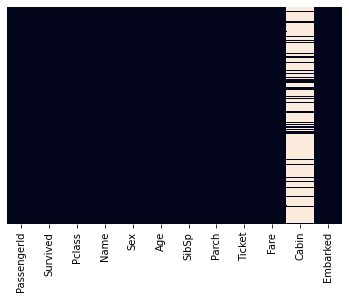

In [32]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False)

In [33]:
# Great! Let’s go ahead and drop the Cabin column.

In [34]:
titanic.drop('Cabin',axis=1,inplace=True)

Converting Categorical Features

In [35]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


Here, we are dummying the sex and embark columns. After dummying, we will drop the rest of the columns which are not needed. (sex and embarked aren't needed as they are the original ones)

In [36]:
# adding dummies to the cat columns
sex = pd.get_dummies(titanic['Sex'])
embark = pd.get_dummies(titanic['Embarked'])

In [37]:
titanic.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [38]:
titanic.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0            1         0       3  22.0      1      0   7.2500
1            2         1       1  38.0      1      0  71.2833
2            3         1       3  26.0      0      0   7.9250
3            4         1       1  35.0      1      0  53.1000
4            5         0       3  35.0      0      0   8.0500

We will concatenate the new sex and embarked columns to the dataframe.

In [39]:
titanic = pd.concat([titanic,sex,embark],axis=1)

In [40]:
titanic.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  female  male  \
0            1         0       3  22.0      1      0   7.2500       0     1   
1            2         1       1  38.0      1      0  71.2833       1     0   
2            3         1       3  26.0      0      0   7.9250       1     0   
3            4         1       1  35.0      1      0  53.1000       1     0   
4            5         0       3  35.0      0      0   8.0500       0     1   

   C  Q  S  
0  0  0  1  
1  1  0  0  
2  0  0  1  
3  0  0  1  
4  0  0  1

Test Train Split

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(titanic.drop('Survived',axis=1), titanic['Survived'], test_size=0.30, random_state = 42) 

Training and Predicting

In [42]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

Evaluation

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       157
           1       0.79      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.80       268
weighted avg       0.81      0.81      0.80       268



In [44]:
# creating Titanic 2 and removing extra variables that aren't right

In [45]:
titanic2 = pd.read_csv('C:/Users/Perrine Mignot/Downloads/titanic.csv')

In [46]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        if Pclass == 2:
            return 29
        else:
            return 24
    else:
         return Age

In [47]:
titanic2['Age'] = titanic2[['Age','Pclass']].apply(impute_age,axis=1)

In [48]:
titanic2.drop('Cabin',axis=1,inplace=True)

In [49]:
# adding dummies to the cat columns but removing extra columns that creates overfitting (e.g male and female, we only need one)
sex2 = pd.get_dummies(titanic2['Sex'],drop_first=True)
embark2 = pd.get_dummies(titanic2['Embarked'],drop_first=True)

In [50]:
titanic2.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [51]:
titanic2 = pd.concat([titanic2,sex2,embark2],axis=1)

In [52]:
titanic2.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0            1         0       3  22.0      1      0   7.2500     1  0  1
1            2         1       1  38.0      1      0  71.2833     0  0  0
2            3         1       3  26.0      0      0   7.9250     0  0  1
3            4         1       1  35.0      1      0  53.1000     0  0  1
4            5         0       3  35.0      0      0   8.0500     1  0  1

In [53]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(titanic2.drop('Survived',axis=1), titanic2['Survived'], test_size=0.30, random_state = 42)

In [54]:
from sklearn.linear_model import LogisticRegression
logmodel2 = LogisticRegression(solver='liblinear')
logmodel2.fit(X2_train,y2_train)
predictions2 = logmodel2.predict(X2_test)

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y2_test,predictions2))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       157
           1       0.79      0.71      0.75       111

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268

